# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [34]:
"""%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()"""

'%matplotlib inline\n\nfrom IPython.core.pylabtools import figsize\n\n\nfigsize(12, 8)\n\nsns.set()'

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Sua análise começa aqui.
athletes.head(5)


,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [128]:
amostra = get_sample(athletes,'height',3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [125]:
def q1():
    
    #Organizar os dados com requerido na questão
    amostra = get_sample(athletes,'height',3000)
    teste = sct.shapiro(amostra)
    
    #obtendo a significancia
    significancia = 1-teste[0]
    
    #analisando se ela é relevante ou não
    if significancia > 0.05 :
        return True
    else:
        return False

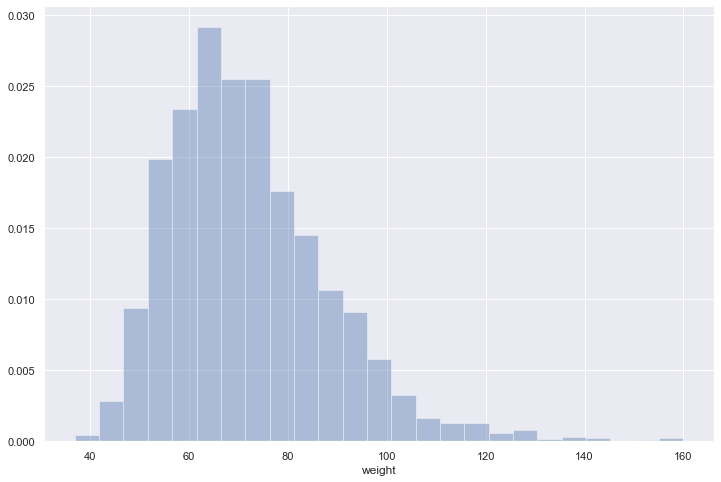

In [126]:
#Grafico para as questões discursivas 
sns.distplot(amostra, kde=False, bins=25, hist_kws={"density": True})

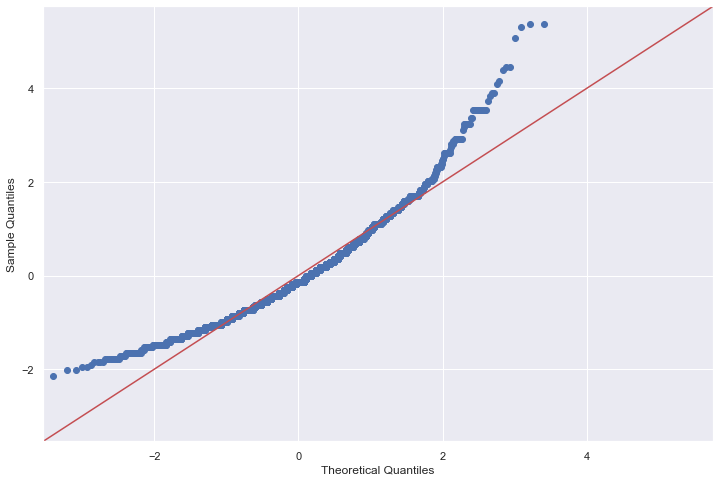

In [127]:
sm.qqplot(amostra, fit=True, line="45");

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    Sim, mostra que os resultados estão condizentes com o gráfico visto pelo teorema do limite central e a simetria relativamente vista, e o resultado, antes analisado, sendo menor que 5% de relevancia pelo método de Shapiro, mostra que é condizente com uma distribuição normal, podendo ser visto pelo gráfico QQ-plot.
    

* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [123]:
def q2():
    #aplicando o método requerido
    teste = sct.jarque_bera(amostra)
    
    #obtendo a significancia
    significancia = 1-teste[0]
    
    #analisando se ela é relevante ou não
    if significancia > 0.05 :
        return True
    else:
        return False

In [124]:
q2()

False

In [25]:
#analisando o resultado
sct.jarque_bera(amostra)
significancia = 1-sct.shapiro(amostra)[0]
print(significancia)

0.052403926849365234


__Para refletir__:

* Esse resultado faz sentido?

    Faz sim, pois como visto, os valores se aproximam muito de uma distribuição normal, logo o valor tem que tender a 0 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [119]:
def q3():
    
    #Organizar os dados com requerido na questão
    amostra = get_sample(athletes,'weight',3000)

    #obtendo a significancia
    significancia = 1-sct.normaltest(amostra)[0]
    
    #analisando se ela é relevante ou não
    if significancia > 0.05 :
        return True
    else:
        return False

In [120]:
q3()

True

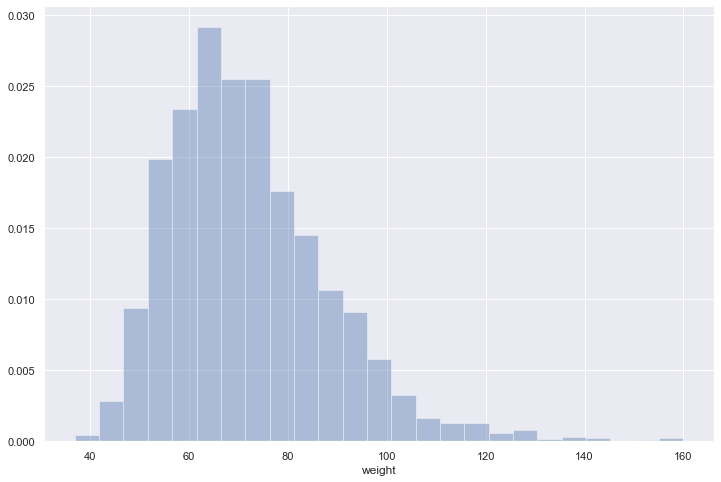

In [29]:
#Grafico para as questões discursivas 
sns.distplot(amostra, kde=False, bins=25, hist_kws={"density": True})

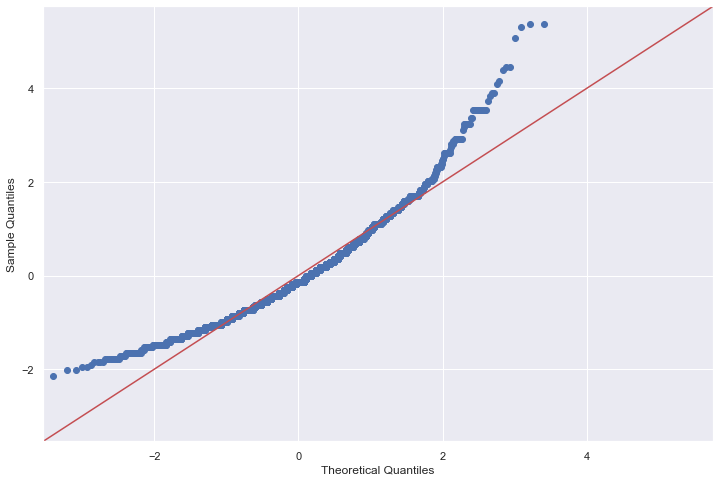

In [30]:
sm.qqplot(amostra, fit=True, line="45");

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

    Sim, é muito visto na presença do gráfico qq-plot, onve é visto o distância mento dos dados nas extremidade, resultando no assimetria no gráfico de frequência. 

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [129]:
def q4():
   
    #Organizar os dados com requerido na questão
    amostra = np.log(get_sample(athletes,'weight',3000))
    teste = sct.normaltest(amostra)
      
    #obtendo a significancia
    significancia = 1-teste[0]
    
    #analisando se ela é relevante ou não
    if significancia > 0.05 :
        return True
    else:
        return False
    
    

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [106]:
#Filtrando os dados necessários

DataFrame = athletes[(athletes['nationality'] == 'BRA') | (athletes['nationality'] == 'USA') | (athletes['nationality'] == 'CAN')]

In [84]:
alpha=0.05

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [111]:
def q5():
    
    #Analisando os dados requisitados
   
    dado1 = DataFrame['height'].loc[DataFrame['nationality']=='BRA']
    dado2 = DataFrame['height'].loc[DataFrame['nationality']=='USA']
    
    pvalor = sct.ttest_ind( dado1 , dado2 , equal_var=False, nan_policy='omit').pvalue
    
    
    return bool(pvalor>alpha)

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    #Analisando os dados requisitados
    
    dado1 = DataFrame['height'].loc[DataFrame['nationality']=='BRA']
    dado2 = DataFrame['height'].loc[DataFrame['nationality']=='CAN']
    
    pvalor = sct.ttest_ind( dado1 , dado2 , equal_var=False, nan_policy='omit').pvalue
    
    return bool(pvalor>alpha)

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [113]:
def q7():
    
    #Analisando os dados requisitados
    
    dado1 = DataFrame['height'].loc[DataFrame['nationality']=='USA']
    dado2 = DataFrame['height'].loc[DataFrame['nationality']=='CAN']
    
    pvalor = sct.ttest_ind( dado1 , dado2 , equal_var=False, nan_policy='omit').pvalue
    
    return float(round(pvalor,8))

In [114]:
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

O valor encontrado remete que as médias das alturas não são iguais, de acordo com a valor de corte (5%).